In [1]:
import time
#ini=time.time()
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
test=pd.read_csv('~/git/BD/temp/test.csv')

In [3]:
test_l=pd.concat([
    test.drop(columns='KG_LIQUIDO_test').assign(tipo='real'),
                 test.drop(columns='KG_LIQUIDO').rename(columns={'KG_LIQUIDO_test':'KG_LIQUIDO'}).assign(tipo='test')
                 ]).sort_values('date')
test_l.CO_MES=test_l.CO_MES.astype(int)

top_scores=pd.read_csv('~/git/BD/temp/top_scores.csv').assign(top_score=1)
test_l=top_scores.merge(test_l,how='outer').fillna(0)

In [4]:
aprovados=pd.read_csv('~/git/BD/temp/aprovados.csv').assign(aprovados=1)
aprovados

,CO_MES,nick,r2,md_c,md_r,accuracy,precision,recall,ad_col,indv,aprovados
0,7,MAP_k,0.134269,1,1.0,1.0,1.0,1.0,1,1,1
1,7,SAM_k,0.697027,1,5.0,1.0,1.0,1.0,1,0,1


In [5]:
test_l=test_l.merge(aprovados,how='outer').fillna(0)

In [6]:
test_l

,CO_MES,nick,r2,md_c,md_r,accuracy,precision,recall,ad_col,indv,top_score,oc,oc_test,date,l_min_y,l_max_y,KG_LIQUIDO,CO_ANO,tipo,aprovados
0,7,MAP_k,0.0,1,0.0,0.0,0.0,0.0,0,0,0.0,0,1,2012-07-01,15,15,0.000000e+00,2012,real,0.0
1,7,MAP_k,0.0,1,0.0,0.0,0.0,0.0,0,0,0.0,0,1,2012-07-01,15,15,0.000000e+00,2012,test,0.0
2,7,MAP_k,0.0,1,0.0,0.0,0.0,0.0,0,1,0.0,0,1,2012-07-01,15,15,0.000000e+00,2012,test,0.0
3,7,MAP_k,0.0,1,0.0,0.0,0.0,0.0,0,1,0.0,0,1,2012-07-01,15,15,0.000000e+00,2012,real,0.0
4,7,MAP_k,0.0,1,0.0,0.0,0.0,0.0,1,0,0.0,0,1,2012-07-01,15,15,0.000000e+00,2012,test,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,7,UREIA_k,0.0,1,13.0,0.0,0.0,0.0,1,0,0.0,1,1,2021-07-01,15,15,2.167981e+07,2021,test,0.0
1860,7,UREIA_k,0.0,1,13.0,0.0,0.0,0.0,1,0,0.0,1,1,2022-07-01,15,15,2.628067e+07,2022,test,0.0
1861,7,UREIA_k,0.0,1,13.0,0.0,0.0,0.0,1,0,0.0,1,1,2022-07-01,15,15,2.590000e+07,2022,real,0.0
1862,7,UREIA_k,0.0,1,13.0,0.0,0.0,0.0,1,0,0.0,1,1,2023-07-01,15,15,2.824650e+07,2023,test,0.0


In [7]:
i=pd.read_csv('~/git/BD/temp/imp_fert_quanti.csv').sort_values(by=['CO_ANO','CO_MES'])
i=i[i.SG_UF_NCM=='BA']
i=i.merge(test_l[['CO_MES','nick']].drop_duplicates())
i=i.groupby(by=['CO_ANO','CO_MES','nick'],observed=False)[['KG_LIQUIDO','VL_FOB']].sum()\
.reset_index().sort_values(by=['CO_ANO','CO_MES','nick'])
i['date']=pd.to_datetime(i.CO_ANO.astype(str)+'/'+i.CO_MES.astype(str)+'/1')
i=i[i.date<test_l.date.min()].assign(tipo='real')#.assign(ad_col=0).assign(md_r=1).assign(indv=0)

In [8]:
test_l_top=test_l[test_l.top_score==1]

In [9]:
test_l_aprv=test_l[test_l.aprovados==1]

In [10]:
test_l_top=pd.concat([i,test_l_top])

In [11]:
test_l_aprv=pd.concat([i.merge(test_l_aprv[['CO_MES','nick']].drop_duplicates()),test_l_aprv])

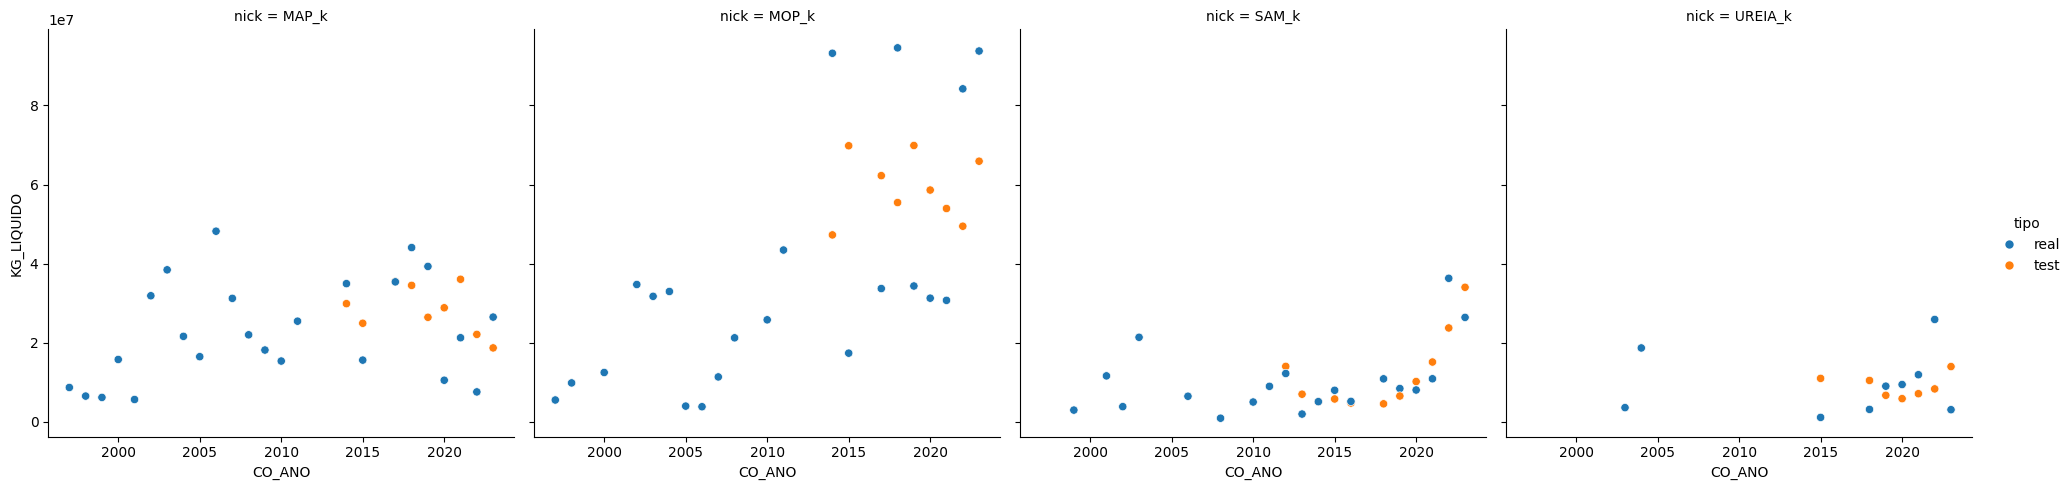

In [12]:
sns.relplot(data=test_l_top,x='CO_ANO',y='KG_LIQUIDO',hue='tipo',col='nick')

In [13]:
display(test_l_top[['ad_col','indv','md_r']].drop_duplicates().dropna())

,ad_col,indv,md_r
478,1.0,1.0,1.0
496,0.0,1.0,1.0
1466,1.0,0.0,5.0
1488,1.0,1.0,13.0


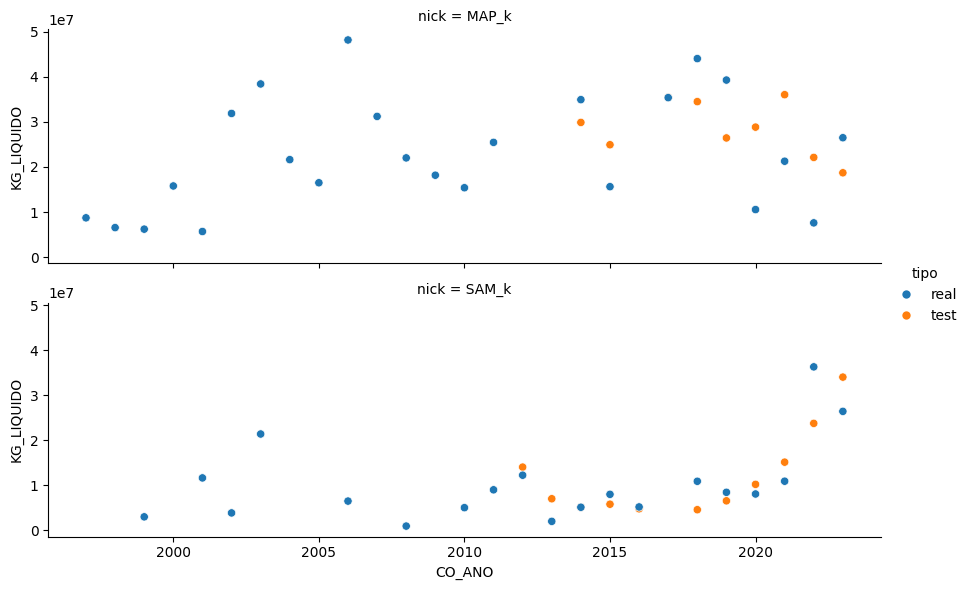

,ad_col,indv,md_r
478,1.0,1.0,1.0
1466,1.0,0.0,5.0


In [14]:
if len(test_l_aprv)>0:
    sns.relplot(data=test_l_aprv,x='CO_ANO',y='KG_LIQUIDO',hue='tipo',row='nick',height=3,aspect=3)
    plt.show()
    display(test_l_aprv[['ad_col','indv','md_r']].drop_duplicates().dropna())
else:
    print('Nenhuma previsão foi aprovada')